In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import KNNImputer
from scipy.stats import kurtosis, skew
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
df=pd.read_csv('SalaryPrediction.csv')

In [5]:
df.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [6]:
df.tail()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0
3906,"1,400",18,Vigo,La Liga,ESP,Defender,0,0


In [7]:
df.sample()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
610,"2,600,000",22,Brentford,Premier League,DEN,Midfilder,136,16


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


In [9]:
df.dtypes

Wage        object
Age          int64
Club        object
League      object
Nation      object
Position    object
Apps         int64
Caps         int64
dtype: object

In [10]:
df.shape

(3907, 8)

In [11]:
df.columns

Index(['Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'], dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3907.0,24.120553,4.935638,18.0,20.0,24.0,28.0,41.0
Apps,3907.0,140.057077,131.694425,0.0,15.0,115.0,224.5,715.0
Caps,3907.0,8.926542,20.518234,0.0,0.0,0.0,6.0,180.0


In [13]:
df.isnull().sum()

Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64

In [14]:
df.dropna()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0


In [15]:
df.isnull().sum()

Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64

In [16]:
df.isna().any(axis=0)

Wage        False
Age         False
Club        False
League      False
Nation      False
Position    False
Apps        False
Caps        False
dtype: bool

In [17]:
df.isnull().sum()

Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64

In [18]:
df['Wage'].fillna('Unknown', inplace=True)
df['Age'].fillna('Unknown', inplace=True)
df['Club'].fillna('Unknown', inplace=True)
df['League'].fillna('Unknown', inplace=True)
df['Nation'].fillna('Unknown', inplace=True)
df['Position'].fillna('Unknown', inplace=True)
df['Apps'].fillna('Unknown', inplace=True)
df['Caps'].fillna('Unknown', inplace=True)
df.isnull().sum()


Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3902    False
3903    False
3904    False
3905    False
3906    False
Length: 3907, dtype: bool

In [20]:
df[df.duplicated()]

,Wage,Age,Club,League,Nation,Position,Apps,Caps
1488,"780,000",18,Chelsea,Premier League,ENG,Midfilder,0,0
2372,"182,000",18,Chelsea,Premier League,ENG,Defender,0,0
2433,"163,000",18,LOSC,Ligue 1 Uber Eats,CMR,Midfilder,2,0
2476,"156,000",18,Man City,Premier League,ENG,Midfilder,0,0
2584,"130,000",18,Liverpool,Premier League,ENG,Forward,0,0
...,...,...,...,...,...,...,...,...
3868,"13,000",18,A. Madrid,La Liga,ESP,Midfilder,0,0
3869,"13,000",18,A. Madrid,La Liga,ESP,Defender,0,0
3875,"13,000",18,Sevilla,La Liga,ESP,Defender,0,0
3878,"13,000",18,Valencia,La Liga,ESP,Defender,0,0


**Data Visualization and Missing Values Treament**

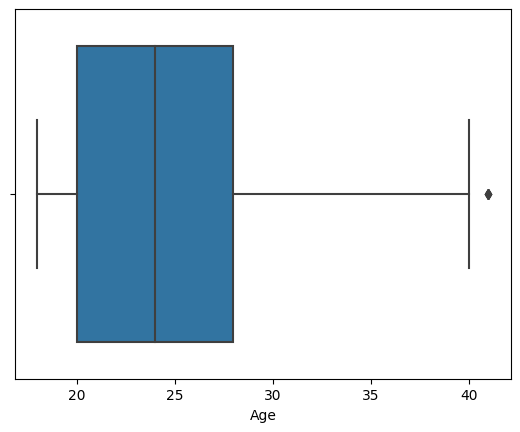

In [21]:
 sns.boxplot(x='Age', data=df)
 plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Apps'}>],
       [<Axes: title={'center': 'Caps'}>, <Axes: >]], dtype=object)

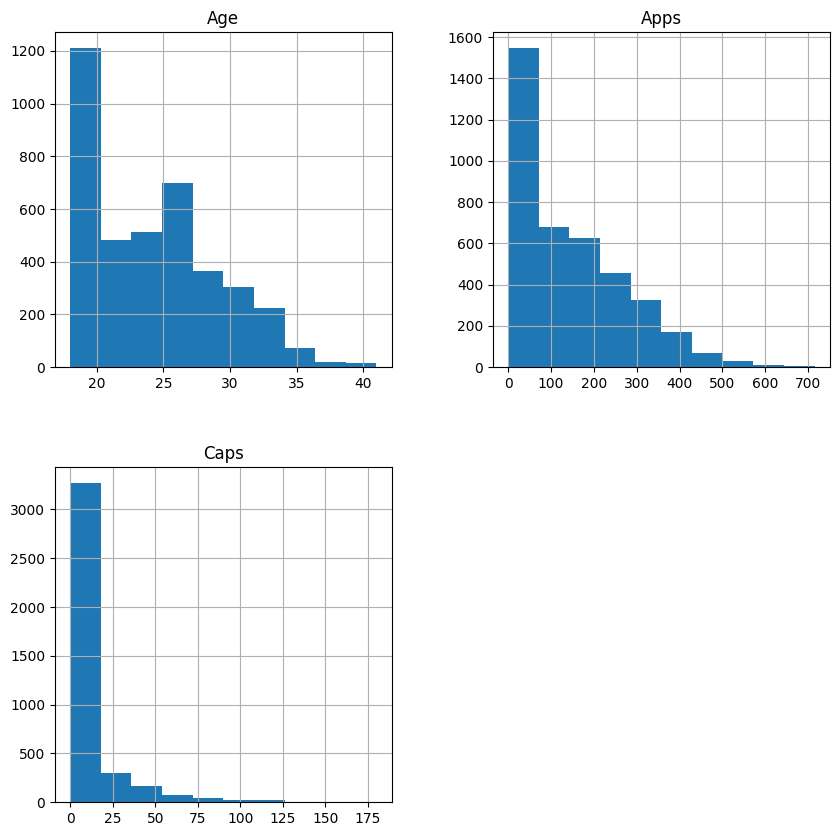

In [22]:
df.hist(figsize=(10,10))

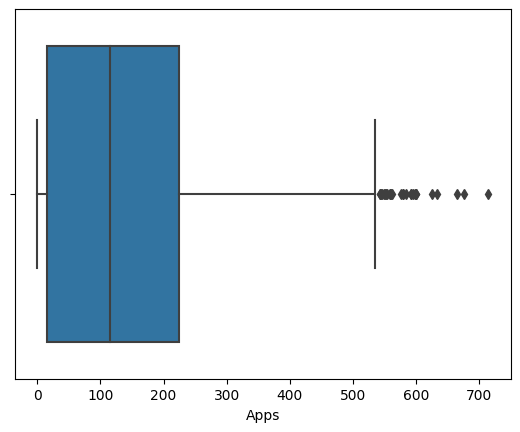

In [23]:
sns.boxplot(x='Apps', data=df)
plt.show()

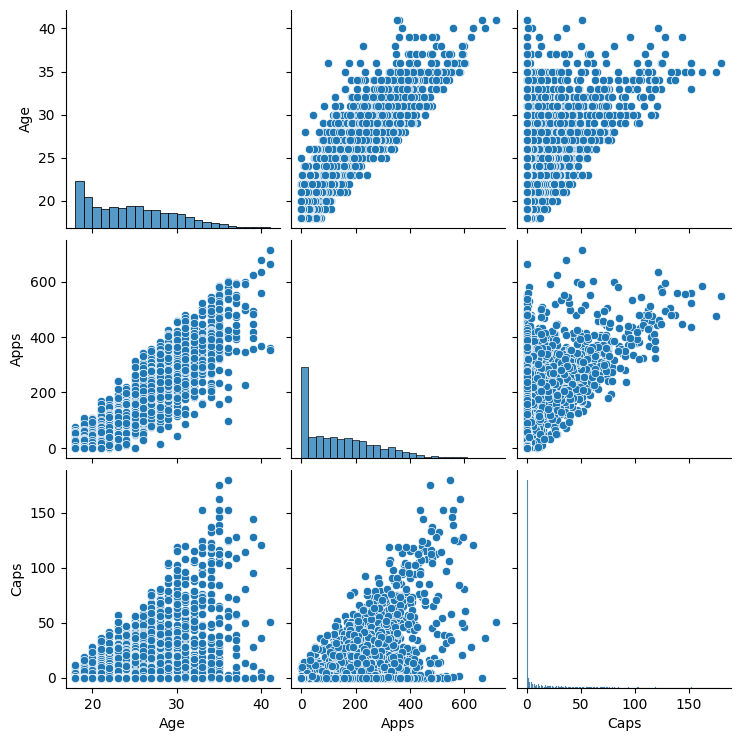

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

scatter_columns = ['Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps']
sns.pairplot(df[scatter_columns])
plt.show()


In [25]:
df.Position.value_counts()

Defender      1490
Midfilder     1160
Forward        827
Goalkeeper     430
Name: Position, dtype: int64

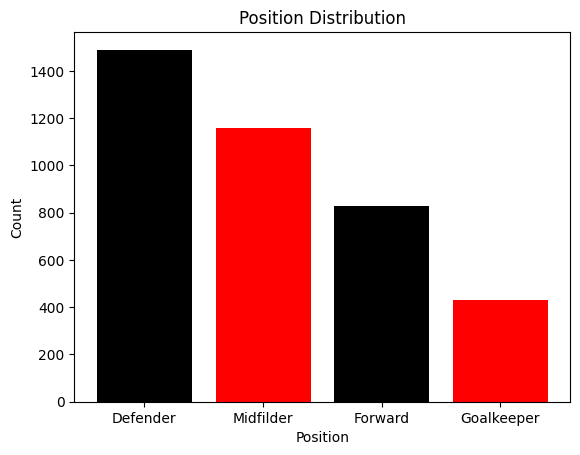

In [26]:
import matplotlib.pyplot as plt

position_counts = df['Position'].value_counts()
colors = ['black', 'red']

plt.bar(position_counts.index, position_counts.values, color=colors)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Position Distribution')
plt.show()


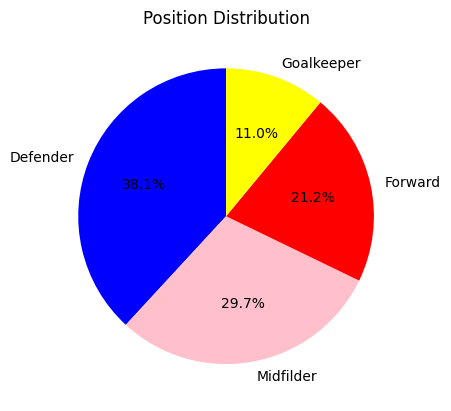

In [27]:
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
gender_counts = df['Position'].value_counts()
colors = ['blue', 'pink','Red','Yellow']

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Adding a title
plt.title('Position Distribution')

# Show the plot
plt.show()


**Binning process**

In [28]:
import numpy as np
import pandas as pd

In [29]:
import numpy as np
import pandas as pd

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
num_bins = int(np.sqrt(len(df)))
columns_to_bin = ['Apps', 'Caps']

# Equal-width binning using pd.qcut for non-numeric columns
for column in columns_to_bin:
    bin_edges = np.linspace(df[column].min(), df[column].max(), num_bins + 1)
    bin_labels = [f'Bin{i}' for i in range(1, num_bins + 1)]
    df[f'{column}_bins'] = pd.cut(df[column], bins=bin_edges, labels=bin_labels, duplicates='drop')

result_columns = [col for column in columns_to_bin for col in [column, f'{column}_bins']]

# Resetting index and filtering the first 15 rows
df_reset = df[result_columns + ['Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps']].reset_index(drop=True)
df_filtered = df_reset.head(15)

print(df_filtered)
print(num_bins)


    Apps Apps_bins  Caps Caps_bins        Wage  Age       Club  \
0    190     Bin17    57     Bin20  46,427,000   23        PSG   
1    324     Bin29   119     Bin41  42,125,000   30        PSG   
2    585     Bin51   162     Bin56  34,821,000   35        PSG   
3    443     Bin39   120     Bin42  19,959,000   31  R. Madrid   
4    480     Bin42    45     Bin16  19,500,000   31    Man UFC   
5    371     Bin33    94     Bin33  18,810,000   30  R. Madrid   
6    427     Bin38   102     Bin36  18,200,000   29      Inter   
7    367     Bin32    85     Bin30  18,200,000   30  Liverpool   
8    326     Bin29    77     Bin27  18,200,000   27    Chelsea   
9    287     Bin25    86     Bin30  18,200,000   29    Man UFC   
10   399     Bin35    91     Bin32  17,680,000   31   Man City   
11   159     Bin14    21      Bin8  17,680,000   22   Man City   
12   433     Bin38   105     Bin37  16,121,000   32  R. Madrid   
13   368     Bin32    50     Bin18  15,965,000   29  A. Madrid   
14   347  

In [30]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Apps', 'Caps'
numerical_columns = ['Wage', 'Age', 'Apps', 'Caps']
categorical_columns = ['Club', 'League', 'Nation', 'Position']

# Convert numerical columns to numeric (handling errors)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

numerical_statistics = pd.DataFrame({
    'Column': numerical_columns,
    'Min': df[numerical_columns].min(),
    'Max': df[numerical_columns].max(),
    'Mean': df[numerical_columns].mean(),
    'Variance': df[numerical_columns].var(),
    'Standard Deviation': df[numerical_columns].std(),
    'Skewness': skew(df[numerical_columns]),
    'Kurtosis': kurtosis(df[numerical_columns])
})

categorical_value_counts = pd.DataFrame({
    'Column': categorical_columns,
    'Value Counts': df[categorical_columns].apply(lambda x: x.value_counts().to_dict())
})

print("Numerical Statistics:")
print(numerical_statistics)
print("\nCategorical Value Counts:")
print(categorical_value_counts)


Numerical Statistics:
     Column   Min    Max        Mean      Variance  Standard Deviation  \
Wage   Wage   NaN    NaN         NaN           NaN                 NaN   
Age     Age  18.0   41.0   24.120553     24.360527            4.935638   
Apps   Apps   0.0  715.0  140.057077  17343.421473          131.694425   
Caps   Caps   0.0  180.0    8.926542    420.997931           20.518234   

      Skewness   Kurtosis  
Wage       NaN        NaN  
Age   0.569030  -0.460465  
Apps  0.854847   0.166011  
Caps  3.418042  14.239202  

Categorical Value Counts:
            Column                                       Value Counts
Club          Club  {'MRT': 64, 'BRG': 61, 'VIZ': 57, 'Chelsea': 5...
League      League  {'Premier League': 875, 'Primiera Liga': 747, ...
Nation      Nation  {'ESP': 452, 'POR': 428, 'ENG': 410, 'FRA': 35...
Position  Position  {'Defender': 1490, 'Midfilder': 1160, 'Forward...


**Covariance Matrix**

In [32]:
import pandas as pd
# Assuming your dataset is named 'df' and has columns: 'Name', 'Gender', 'Count', 'Probability' numerical_columns = ['Count', 'Probability']
covariance_matrix = df[numerical_columns].cov()
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
      Wage         Age          Apps         Caps
Wage   NaN         NaN           NaN          NaN
Age    NaN   24.360527    602.115749    46.023451
Apps   NaN  602.115749  17343.421473  1436.704399
Caps   NaN   46.023451   1436.704399   420.997931


**Covariance Matrix Heat Map**

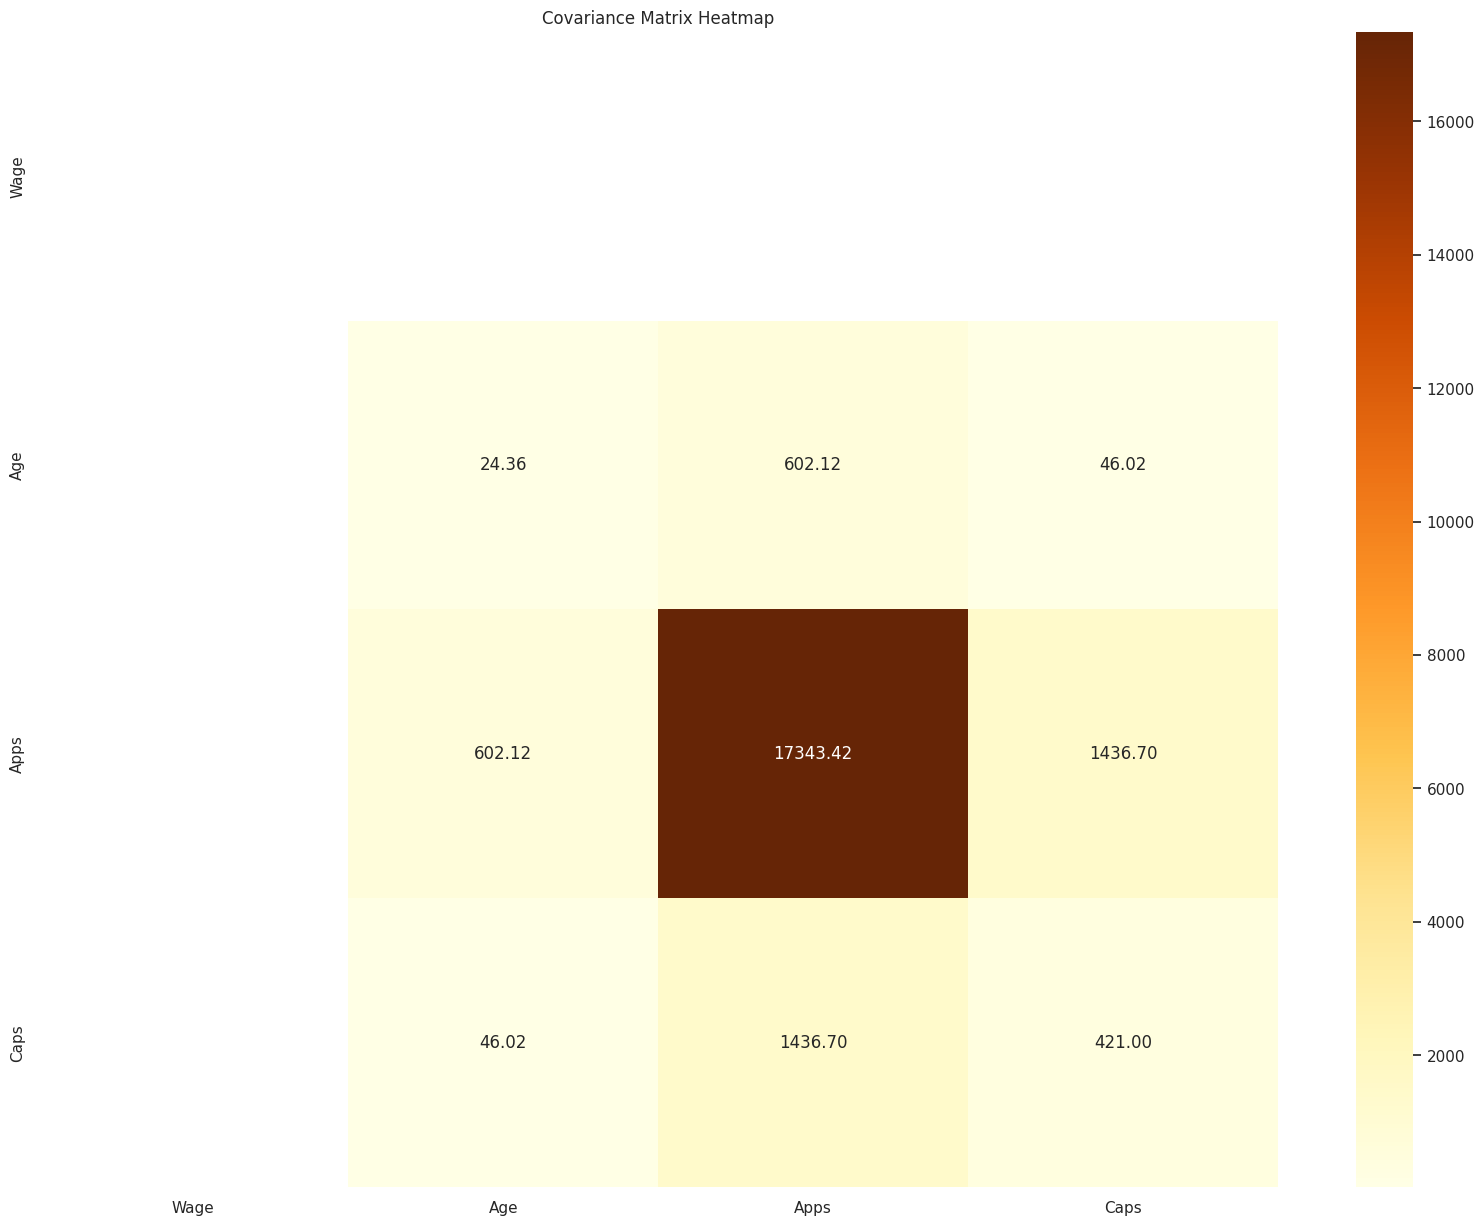

In [33]:
plt.figure(figsize=(20, 15))
sns.set(style="white") # Set background style
sns.heatmap(covariance_matrix, annot=True, cmap="YlOrBr", fmt=".2f",xticklabels=numerical_columns, yticklabels=numerical_columns)
plt.title("Covariance Matrix Heatmap")
plt.show()

**Correlation Matrix**

In [34]:
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

      Wage       Age      Apps      Caps
Wage   NaN       NaN       NaN       NaN
Age    NaN  1.000000  0.926338  0.454460
Apps   NaN  0.926338  1.000000  0.531692
Caps   NaN  0.454460  0.531692  1.000000


**Correlation Matrix Heatmap**

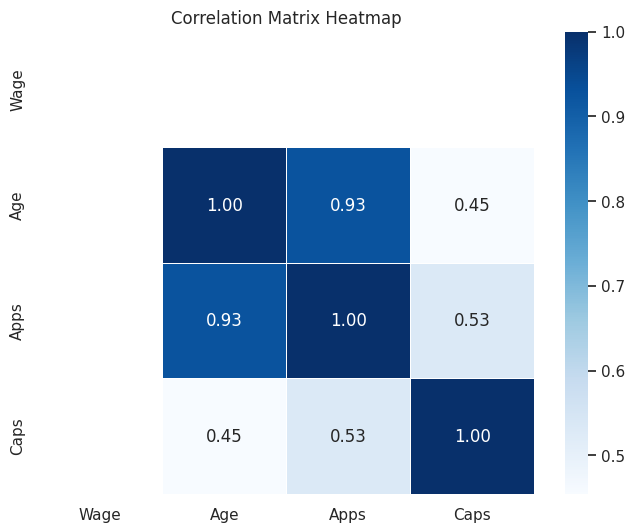

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C**hi Square Test**

In [36]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
categorical_columns = ['Club', 'League']
contingency_table = pd.crosstab(df[categorical_columns[0]], df[categorical_columns[1]])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistics:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


Chi-Square Statistics: 19535.0
P-value: 0.0
Degrees of Freedom: 575
Expected Frequencies:
League         Bundesliga   La Liga  Ligue 1 Uber Eats  Premier League  \
Club                                                                     
1. FC Koln       4.704633  5.017149           3.919120        7.390581   
A. Bilbao        3.849245  4.104940           3.206552        6.046839   
A. Madrid        4.847197  5.169184           4.037881        7.614538   
AC Ajaccio       3.849245  4.104940           3.206552        6.046839   
AJ Auxerre       3.564116  3.800870           2.969030        5.598925   
...                   ...       ...                ...             ...   
VfL Wolfsburg    4.847197  5.169184           4.037881        7.614538   
Vigo             4.989762  5.321218           4.156642        7.838495   
Villarreal       3.849245  4.104940           3.206552        6.046839   
West Ham         5.274891  5.625288           4.394164        8.286409   
Wolves           6.700

**Z-Test**

In [37]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
sample_size = 100
df_sample = df['Wage'].sample(sample_size)

population_mean = df['Wage'].mean()
population_std = df['Wage'].std()
sample_mean = df_sample.mean()

alpha = 0.05
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
print("Z-Score:", z_score)

z_critical = stats.norm.ppf(1 - alpha)
print("Critical Z-Score:", z_critical)

if z_score > z_critical:
    print("Reject H0")
else:
    print("Fail to Reject H0")


Z-Score: nan
Critical Z-Score: 1.6448536269514722
Fail to Reject H0


**ANOVA**

In [38]:
from scipy.stats import f_oneway

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
anova_result = f_oneway(
    df['Wage'][df['Position'] == 'Goalkeeper'],
    df['Wage'][df['Position'] == 'Defender'],
    df['Wage'][df['Position'] == 'Midfilder'],
    df['Wage'][df['Position'] == 'Forward']
)

print("\nANOVA Result")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)



ANOVA Result
F-statistic: nan
P-value: nan


**Feature reduction LDA and PCA**

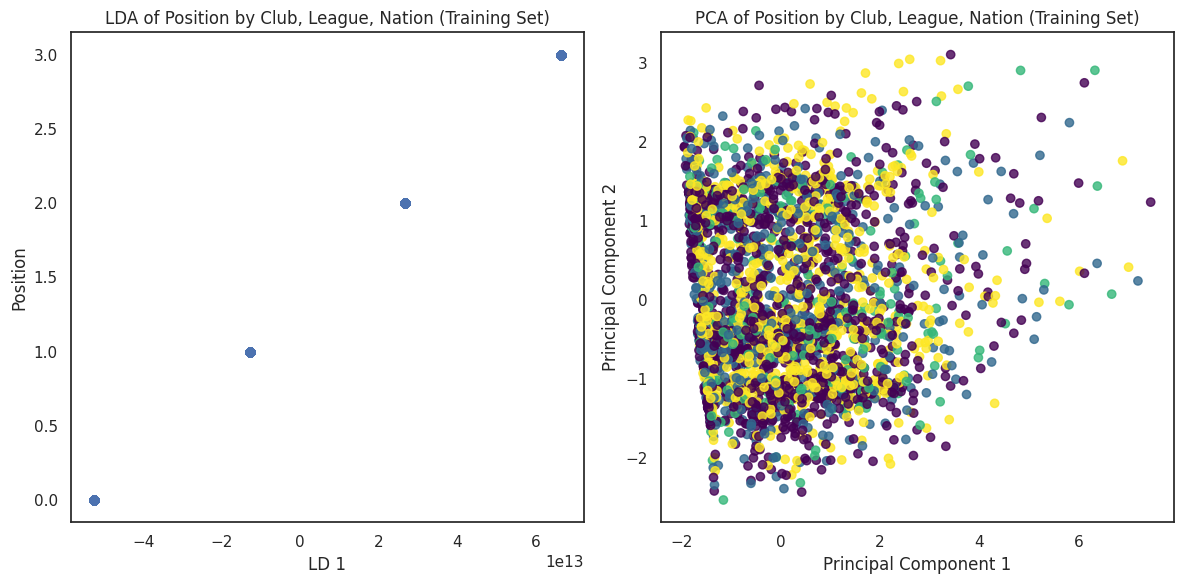

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
label_encoder = LabelEncoder()
categorical_columns = ['Club', 'League', 'Nation', 'Position']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Select relevant columns
columns_of_interest = ['Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Wage', 'Age', 'Apps', 'Caps']
features = df[columns_of_interest]
target = df['Position_encoded']  # Assuming 'Position' is the target variable for demonstration

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Applying PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plotting LDA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_lda, y_train, alpha=0.8)
plt.title('LDA of Position by Club, League, Nation (Training Set)')
plt.xlabel('LD 1')
plt.ylabel('Position')

# Plotting PCA results
plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.8)
plt.title('PCA of Position by Club, League, Nation (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


**Naive Bayes**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
label_encoder = LabelEncoder()
categorical_columns = ['Club', 'League', 'Nation', 'Position']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

features = df[['Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Wage', 'Age', 'Apps', 'Caps']]
target = df['Position_encoded']  # Assuming 'Position' is the target variable for demonstration

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 1.0
Confusion Matrix:
[[292   0   0   0]
 [  0 174   0   0]
 [  0   0  95   0]
 [  0   0   0 221]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00       221

    accuracy                           1.00       782
   macro avg       1.00      1.00      1.00       782
weighted avg       1.00      1.00      1.00       782



In [45]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.3 MB/s eta 0:00:00


In [65]:
unique_wage_values = df['Wage'].unique()
unique_club_values = df['Club'].unique()

# Choose valid values
valid_wage = unique_wage_values[0]  # Replace with a valid value
valid_club = unique_club_values[0]  # Replace with a valid value

# Example of querying the probabilities
valid_value = 23  # Replace with a valid value in your dataset
try:
    prob_age_given_wage_club = age_given_wage_club.loc[(valid_wage, valid_club), valid_value]
    print(f"Probability of Age being {valid_value} given Wage='{valid_wage}' and Club='{valid_club}': {prob_age_given_wage_club}")
except KeyError:
    print(f"Combination not found in the dataset: Wage='{valid_wage}', Club='{valid_club}', Age={valid_value}")


Combination not found in the dataset: Wage='nan', Club='PSG', Age=23


**Decision Tree (Entropy, and error estimation)**

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
label_encoder = LabelEncoder()
categorical_columns = ['Club', 'League', 'Nation', 'Position']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Select relevant columns
columns_of_interest = ['Wage', 'Age', 'Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Apps', 'Caps']
features = df[columns_of_interest]
target = df['Age']  # Change the target variable to 'Age'

# Handle missing values in features
imputer_features = SimpleImputer(strategy='mean')
features_imputed = imputer_features.fit_transform(features)

# Handle missing values in the target variable
target = df['Age']  # Change the target variable to 'Age'
target_imputed = target.replace(0, np.nan)  # Replace 0 values with NaN for imputation
imputer_target = SimpleImputer(strategy='mean')
target_imputed = imputer_target.fit_transform(target_imputed.values.reshape(-1, 1)).ravel()

# Replace NaN values with 0 in the target variable
target_imputed = np.nan_to_num(target_imputed, nan=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_imputed, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
dt.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_predictions)
mse = mean_squared_error(y_test, dt_predictions)
precision = precision_score(y_test, dt_predictions, average='macro')
recall = recall_score(y_test, dt_predictions, average='macro')
f1 = f1_score(y_test, dt_predictions, average='macro')

# Print metrics
print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.989769820971867
Mean Squared Error: 0.09335038363171355
Precision: 0.7678571428571429
Recall: 0.7916666666666666
F1 Score: 0.775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**K-NN (Different distances)**

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
label_encoder = LabelEncoder()
categorical_columns = ['Club', 'League', 'Nation', 'Position']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Select relevant columns
columns_of_interest = ['Wage', 'Age', 'Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Apps', 'Caps']
features = df[columns_of_interest]
target = df['Age']  # Change the target variable to 'Age'

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Initialize KNN classifier with k=3 (you can adjust k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

# Print metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.29028132992327366
Classification Report:
              precision    recall  f1-score   support

          18       0.70      0.81      0.75       116
          19       0.46      0.60      0.52        68
          20       0.22      0.20      0.21        54
          21       0.26      0.17      0.21        53
          22       0.13      0.19      0.15        42
          23       0.22      0.19      0.20        52
          24       0.22      0.29      0.25        45
          25       0.11      0.12      0.12        56
          26       0.09      0.09      0.09        45
          27       0.11      0.13      0.12        39
          28       0.15      0.13      0.14        39
          29       0.16      0.12      0.14        41
          30       0.04      0.03      0.04        31
          31       0.17      0.15      0.16        27
          32       0.36      0.22      0.28        18
          33       0.50      0.12      0.20        16
          34       0.25     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**PCA**

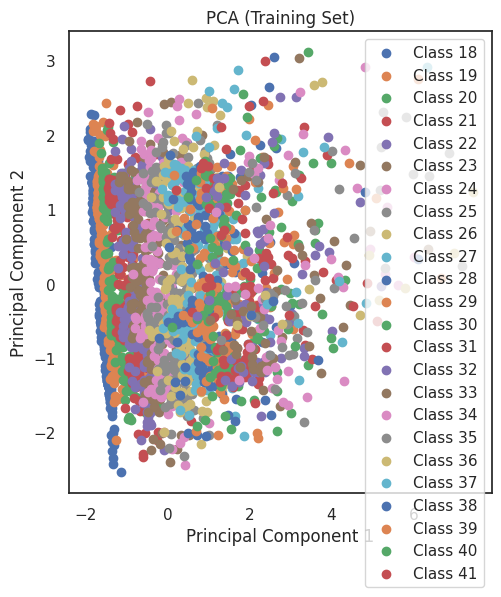

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label in np.unique(y_train):
 plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Class {label}')
plt.title('PCA (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

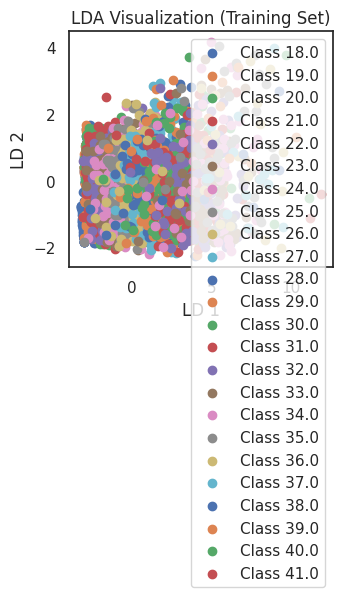

In [82]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
label_encoder = LabelEncoder()
categorical_columns = ['Club', 'League', 'Nation', 'Position']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Select relevant columns
columns_of_interest = ['Wage', 'Age', 'Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Apps', 'Caps']
features = df[columns_of_interest]
target = df['Age']  # Change the target variable to 'Wage' or any other column as needed

# Handle missing values in features
imputer_features = SimpleImputer(strategy='mean')
features_imputed = imputer_features.fit_transform(features)

# Handle missing values in the target variable
target = df['Age']  # Assuming 'Wage' is the target variable
target_imputed = target.replace(0, np.nan)  # Replace 0 values with NaN for imputation
imputer_target = SimpleImputer(strategy='mean')
target_imputed = imputer_target.fit_transform(target_imputed.values.reshape(-1, 1)).ravel()

# Replace NaN values with 0 in the target variable
target_imputed = np.nan_to_num(target_imputed, nan=0)

# Check the number of features and classes in your dataset
n_features = features_imputed.shape[1]
n_classes = len(np.unique(target_imputed))

# Set n_components to the minimum of available features and classes - 1
n_components = min(n_features, n_classes - 1) if min(n_features, n_classes - 1) > 0 else None

# Assuming X_train_lda is the result of LDA transformation on your training set
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit_transform(features_imputed, target_imputed)

# Visualize LDA results
plt.subplot(1, 2, 2)

# Check if there is more than one component for visualization
if n_components and n_components > 1:
    for label in np.unique(target_imputed):
        plt.scatter(X_train_lda[target_imputed == label, 0], X_train_lda[target_imputed == label, 1], label=f'Class {label}')

    plt.title('LDA Visualization (Training Set)')
    plt.xlabel('LD 1')
    plt.ylabel('LD 2')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Only one component available. Unable to visualize in 2D.")


**Model** **evaluations**

**K-NN (different distances) & data splitting**

In [98]:
import warnings
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
label_encoder = LabelEncoder()
categorical_columns = ['Club', 'League', 'Nation', 'Position']

for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

X = df[['Wage', 'Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Apps', 'Caps']]
y = df['Age']  # 'Age' as the target variable

warnings.filterwarnings("ignore")

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Define K-NN regressor with different distance metrics
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

for k in k_values:
    for metric in distance_metrics:
        # Train K-NN regressor
        knn = KNeighborsRegressor(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn.predict(X_test)

        # Calculate mean absolute error
        mae = mean_absolute_error(y_test, y_pred)
        print(f"K = {k}, Distance Metric = {metric}: Mean Absolute Error = {mae:.4f}")


K = 3, Distance Metric = euclidean: Mean Absolute Error = 1.4390
K = 3, Distance Metric = manhattan: Mean Absolute Error = 1.4467
K = 3, Distance Metric = chebyshev: Mean Absolute Error = 1.4267
K = 5, Distance Metric = euclidean: Mean Absolute Error = 1.3959
K = 5, Distance Metric = manhattan: Mean Absolute Error = 1.3821
K = 5, Distance Metric = chebyshev: Mean Absolute Error = 1.3808
K = 7, Distance Metric = euclidean: Mean Absolute Error = 1.3692
K = 7, Distance Metric = manhattan: Mean Absolute Error = 1.3732
K = 7, Distance Metric = chebyshev: Mean Absolute Error = 1.3646


In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
label_encoder = LabelEncoder()
categorical_columns = ['Club', 'League', 'Nation', 'Position']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

X = df[['Wage', 'Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Apps', 'Caps']]
y = df['Age']  # 'Age' as the target variable

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Define K-NN regressor with different distance metrics
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

for k in k_values:
    for metric in distance_metrics:
        # Train K-NN regressor
        knn = KNeighborsRegressor(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn.predict(X_test)

        # Calculate regression metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"K = {k}, Distance Metric = {metric}:")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared: {r2:.4f}")
        print("------------")


K = 3, Distance Metric = euclidean:
Mean Absolute Error: 1.4390
Mean Squared Error: 4.0523
R-squared: 0.8412
------------
K = 3, Distance Metric = manhattan:
Mean Absolute Error: 1.4467
Mean Squared Error: 4.1122
R-squared: 0.8388
------------
K = 3, Distance Metric = chebyshev:
Mean Absolute Error: 1.4267
Mean Squared Error: 3.8728
R-squared: 0.8482
------------
K = 5, Distance Metric = euclidean:
Mean Absolute Error: 1.3959
Mean Squared Error: 3.6762
R-squared: 0.8559
------------
K = 5, Distance Metric = manhattan:
Mean Absolute Error: 1.3821
Mean Squared Error: 3.6407
R-squared: 0.8573
------------
K = 5, Distance Metric = chebyshev:
Mean Absolute Error: 1.3808
Mean Squared Error: 3.6197
R-squared: 0.8581
------------
K = 7, Distance Metric = euclidean:
Mean Absolute Error: 1.3692
Mean Squared Error: 3.5210
R-squared: 0.8620
------------
K = 7, Distance Metric = manhattan:
Mean Absolute Error: 1.3732
Mean Squared Error: 3.6208
R-squared: 0.8581
------------
K = 7, Distance Metric =

**k-fold cross validation and average accuracy**

In [118]:
from sklearn.impute import SimpleImputer

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
# Define X and y
X = df[['Wage', 'Age', 'Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Apps', 'Caps']]
y = df['Age']  # Replace 'Target_Column' with your actual target column

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize KFold and Decision Tree Classifier
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42)
fold = 1
accuracies = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X_imputed):  # Use X_imputed instead of X
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold} Accuracy: {accuracy}")
    fold += 1

# Calculate average accuracy
avg_accuracy = sum(accuracies) / len(accuracies)
print(f"\nAverage Accuracy: {avg_accuracy}")


Fold 1 Accuracy: 0.9987212276214834
Fold 2 Accuracy: 1.0
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 1.0

Average Accuracy: 0.9997442455242966


Confusion Matrix:
[[124   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  78   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  46   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  55   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  53   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  53   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  55   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  44   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  38   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   

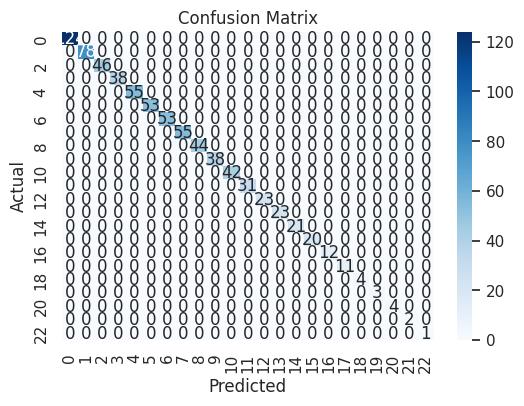

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Error Rate'),
  Text(2, 0, 'Precision'),
  Text(3, 0, 'Recall'),
  Text(4, 0, 'F1 Score')])

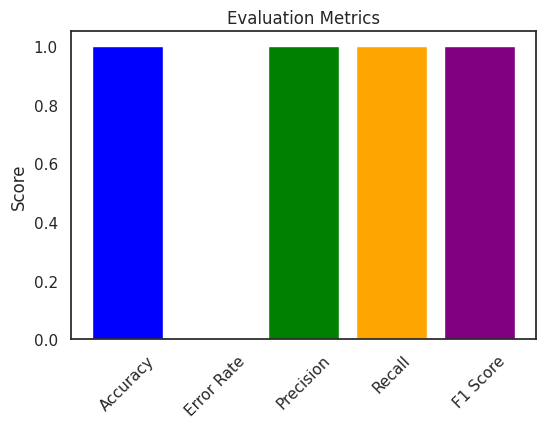

In [125]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

# Precision, Recall, and F1 Score for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Plot evaluation metrics
metrics = ['Accuracy', 'Error Rate', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, error_rate, precision, recall, f1]
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'red', 'green', 'orange', 'purple'])
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)


**overfitting&underfitting**

Confusion Matrix:
[[116   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  68   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  54   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0  53   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  42   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0  52   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  56   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39   0   0   0   0   0   0   0   0

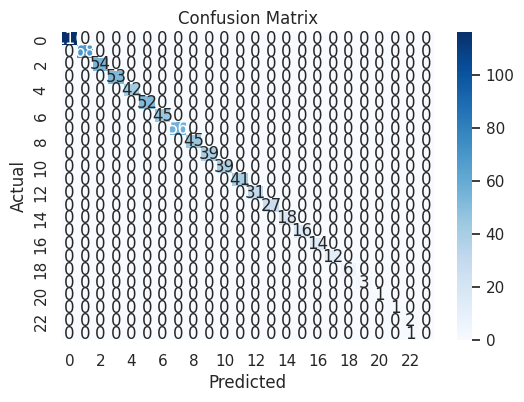

Training Accuracy: 1.0
Testing Accuracy: 0.9987212276214834


In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
categorical_columns = ['Club', 'League', 'Nation', 'Position']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Select relevant columns
features = df_encoded[['Wage', 'Age', 'Apps', 'Caps'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Club_')])]
target = df['Age']  # Replace 'YourTargetColumn' with the actual target column name

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
accuracy = model.score(X_test, y_test)
error_rate = 1 - accuracy

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nTesting Accuracy:", accuracy)
print("Testing Error Rate:", error_rate)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Analyze overfitting or underfitting
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {accuracy}")


In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming your dataset is named 'df' and has columns: 'Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'
label_encoder = LabelEncoder()
categorical_columns = ['Club', 'League', 'Nation', 'Position']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Select relevant columns
columns_of_interest = ['Wage', 'Age', 'Club_encoded', 'League_encoded', 'Nation_encoded', 'Position_encoded', 'Apps', 'Caps']
features = df[columns_of_interest]
target = df['Age']  # Assuming 'Wage' is the target variable

# Handle missing values in features
imputer_features = SimpleImputer(strategy='mean')
features_imputed = imputer_features.fit_transform(features)

# Handle missing values in the target variable
target_imputed = target.replace(0, np.nan)  # Replace 0 values with NaN for imputation
imputer_target = SimpleImputer(strategy='mean')
target_imputed = imputer_target.fit_transform(target_imputed.values.reshape(-1, 1)).ravel()

# Replace NaN values with 0 in the target variable
target_imputed = np.nan_to_num(target_imputed, nan=0)

# Ensure that target_imputed has the same length as features_imputed
assert len(target_imputed) == len(features_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_imputed, test_size=0.2, random_state=42)

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Train the K-NN classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[94 14  7  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19 41  4  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12 19 11  5  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  9  9  9  8  8  1  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  4 11  5  8  7  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  6 13 10  9  3  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  2  3  6  8 13  9  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  2  2 10  4 15  7  9  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  4  8 14  4  8  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  3  3 12  5  5  5  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  3  7  7  8  5  4  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  1  3  9  7  6  5  4  3  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  1  2  5  6  6  1  5  1  0  1  0  0  0  0  0  0  0]
 [ 0  0